<a href="https://colab.research.google.com/github/SarahSouzaPontes/randomForest/blob/main/Bagging_RadomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


#importacao via github
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

dados.head(5)



#mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados ['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

#separacao de var preditoras e resposta
X = dados[['bmi', 'charges']]
y = dados['smoker']



UPGRADE NA TECNICA DE VALIDACAO: K-FOLD REPETIDO ETRATIFICADO

In [5]:
#configuração da valdação cruzada

from sklearn.model_selection import cross_validate

from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

Bagging de Modelos

In [13]:
#Bagging
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

modelo_base = DecisionTreeClassifier()

modelo = BaggingClassifier(n_estimators = 50)#, base_estimator= modelo_base)
#num de modelos criados 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9552

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


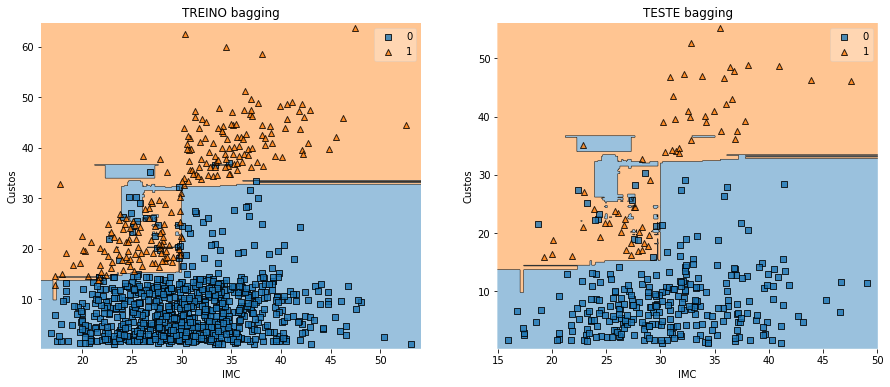

In [14]:
#Reggiao de Decisao
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO bagging')

plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE bagging')

plt.show()

RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 200,
                                max_features = 'auto',
                                bootstrap = True,
                                max_depth = 4,
                                min_samples_split = 10)
medidas = cross_validate(modelo, X, y , cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)


0.9629

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 200,
                                max_features = 'auto',
                                bootstrap = True,
                                max_depth = 7,
                                min_samples_split = 50)
medidas = cross_validate(modelo, X, y , cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9604

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


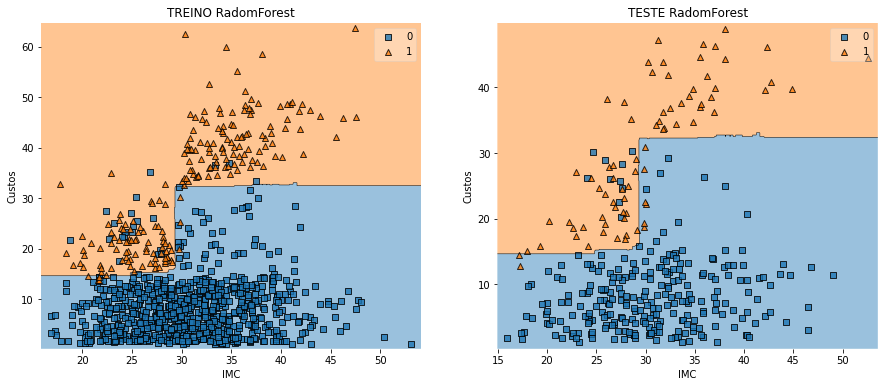

In [22]:
#Reggiao de Decisao
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO RadomForest')

plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE RadomForest')

plt.show()

IMPORTANCIA DE VARIAVEIS

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
modelo_base = RandomForestClassifier(max_depth= 3)
modelo_base.fit(X,y)



RandomForestClassifier(max_depth=3)

In [25]:
modelo_base.feature_importances_

array([0.07871586, 0.92128414])

In [26]:
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importancia'] = modelo_base.feature_importances_
variaveis
#charges mais importante

,variavel,importancia
0,bmi,0.078716
1,charges,0.921284


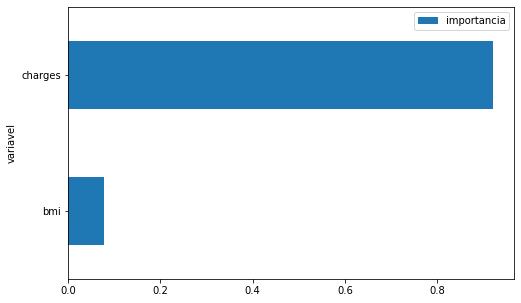

In [33]:
variaveis.sort_values(by = 'importancia', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind = 'barh', figsize = (8,5));